In [751]:
import pandas as pd
import numpy as np
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from sklearn.metrics import mean_squared_error

In [752]:
df = pd.read_csv('houses_train.csv')

In [753]:
df.head()

,Unnamed: 0,price,condition,district,max_floor,street,num_rooms,region,area,url,num_bathrooms,building_type,floor,ceiling_height
0,5546,130000.0,newly repaired,Center,4,Sayat Nova Ave,3,Yerevan,96.0,http://www.myrealty.am/en/item/28244/3-senyaka...,1,stone,3,3.2
1,2979,65000.0,good,Arabkir,5,Hr.Kochar St,3,Yerevan,78.0,http://www.myrealty.am/en/item/18029/3-senyaka...,1,stone,2,2.8
2,2698,129000.0,good,Center,10,M.Khorenatsi St,3,Yerevan,90.0,http://www.myrealty.am/en/item/37797/3-senyaka...,1,panel,3,2.8
3,4548,52000.0,newly repaired,Center,14,Argishti St,2,Yerevan,53.0,http://www.myrealty.am/en/item/36153/2-senyaka...,1,monolit,5,3.0
4,2982,65000.0,newly repaired,Center,12,Mashtots Ave,2,Yerevan,47.0,http://www.myrealty.am/en/item/17566/2-senyaka...,1,panel,3,2.8


In [754]:
df[df.columns[:]].corr()['price'][:]

Unnamed: 0        0.029362
price             1.000000
max_floor         0.093140
num_rooms         0.348394
area              0.617961
num_bathrooms     0.429127
floor             0.061322
ceiling_height    0.378490
Name: price, dtype: float64

In [755]:
data = df.drop(['region', 'url', 'price','Unnamed: 0', 'street'], axis = 1)
y = df['price']

In [756]:
dt=pd.get_dummies(data)

In [757]:
X_train, X_test, y_train, y_test = train_test_split(dt, y, test_size=0.2)

In [758]:
lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)
predictions = lm.predict(X_test)

In [759]:
y_test[:10]

4944     85000.0
3321    105000.0
1191    120000.0
2588    118000.0
656      48000.0
961      48900.0
2126    195000.0
4187     38000.0
4096     63000.0
4918     95000.0
Name: price, dtype: float64

In [760]:
predictions[:10]

array([134287.81861699, 113932.12075053, 117538.45331331, 108167.46847443,
        49209.23165567,  61471.97936796, 148216.12808615,  50555.09437991,
        44188.21276966, 130738.38465165])

Text(0, 0.5, 'Predictions')

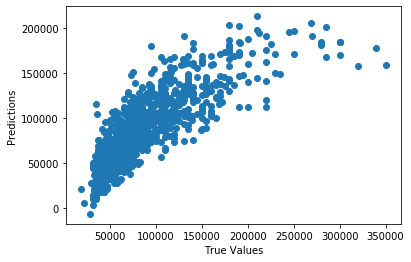

In [761]:
plt.scatter(y_test, predictions)
plt.xlabel('True Values')
plt.ylabel('Predictions')

In [762]:
print ('Test RMSE:', np.sqrt(mean_squared_error(predictions, y_test)))
print ('Train RMSE:', np.sqrt(mean_squared_error(lm.predict(X_train), y_train)))

Test RMSE: 27812.117077522256
Train RMSE: 29545.080825351237


In [763]:
lm.score(X_test, y_test)

0.6876383218419427

In [764]:
lm.intercept_

-92749.91920227995

## Cross Validation

In [765]:
from sklearn.model_selection import KFold

In [766]:
kf = KFold(n_splits=10)
test_rmse = []
train_rmse = []
score = []

for train_index, test_index in kf.split(dt):
    xTrain, xTest = dt.loc[train_index], dt.loc[test_index]
    yTrain, yTest = y[train_index], y[test_index]
    
    m = lm.fit(xTrain, yTrain)
    predict_test = lm.predict(xTest)
    predict_train = lm.predict(xTrain)
    score1=lm.score(xTest,yTest)
    
    test_rmse.append(np.sqrt(mean_squared_error(yTest, predict_test)))
    train_rmse.append(np.sqrt(mean_squared_error(yTrain, predict_train)))
    score.append(score1)
    

In [767]:
np.mean(test_rmse)

29255.64768250804

In [768]:
np.mean(score)

0.6724522699802544

## Ridge Regression

In [769]:
from sklearn.datasets import make_regression
from matplotlib import pyplot as plt
import numpy as np
from sklearn.linear_model import Ridge

In [770]:
data = df.drop(['region', 'url', 'price','Unnamed: 0'], axis = 1)
y = df['price']

In [771]:
dt=pd.get_dummies(data)

In [772]:
X_train, X_test, y_train, y_test = train_test_split(dt, y, test_size=0.2)

In [773]:
rr = Ridge(alpha=0.5)
rr.fit(X_test, y_test)
w = rr.coef_

In [774]:
p=rr.predict(X_test)

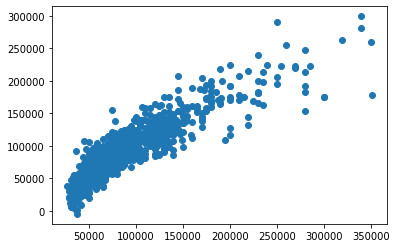

In [775]:
plt.scatter(y_test, p)

In [776]:
print ('Test RMSE:', np.sqrt(mean_squared_error(p, y_test)))
print ('Train RMSE:', np.sqrt(mean_squared_error(rr.predict(X_train), y_train)))

Test RMSE: 21694.772948877573
Train RMSE: 24960.48469705406


In [777]:
rr.score(X_test,y_test)

0.8220610612329488

In [778]:
kf = KFold(n_splits=10)
test_rmse = []
train_rmse = []
score = []

for train_index, test_index in kf.split(dt):
    xTrain, xTest = dt.loc[train_index], dt.loc[test_index]
    yTrain, yTest = y[train_index], y[test_index]
    
    rr = Ridge(alpha=0.5)
    rr.fit(xTest, yTest)
    predict_test = rr.predict(xTest)
    predict_train = rr.predict(xTrain)
    
    test_rmse.append(np.sqrt(mean_squared_error(yTest, predict_test)))
    train_rmse.append(np.sqrt(mean_squared_error(yTrain, predict_train)))
    score.append(score1)
    
    test_rmse.append(np.sqrt(mean_squared_error(yTest, predictions)))
    train_rmse.append(np.sqrt(mean_squared_error(yTrain, predictions_train)))

In [779]:
np.mean(test_rmse)

19774.175341011774

In [780]:
np.mean(score)

0.8503775213562521